## Diagnostic metrics

#### import ACA3 data

In [1]:
import pandas as pd
import numpy as np
ACAdata = pd.read_csv("/Users/ljy/Desktop/HUDK4050 data mining/ACA/aca3_dataset/CollegeScorecard.csv")
ACAdata2 = ACAdata[['UNITID', 'PCIP13', 'CIP13BACHL', 'ADM_RATE_ALL', 'RET_FT4', 'RET_PT4', 'RET_FTL4', 'RET_PTL4', 'C150_4', 'C200_4', 'C200_L4', 'C150_4_POOLED','CDR3', 'PELL_RPY_3YR_RT', 'GRAD_DEBT_MDN', 'WDRAW_DEBT_MDN', 'INEXPFTE', 'AVGFACSAL']]
ACAdata2 = ACAdata2.replace('PrivacySuppressed', 0.0)
ACAdata2 = ACAdata2.replace('nan', -1)
ACAdata2 = ACAdata2.fillna(-1)

from sklearn.decomposition import PCA
ACAdata2_noid = ACAdata2.drop(['UNITID'], axis = 1)
pca = PCA(n_components=7)
pca.fit(ACAdata2_noid)
ACAdata2_dr = pca.transform(ACAdata2_noid)

/Users/ljy/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (7,9,1427,1542,1561,1575) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


#### Scree plot

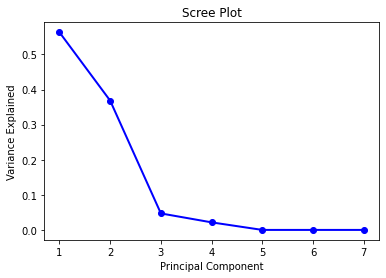

[5.63132652e-01 3.68361937e-01 4.69839090e-02 2.15214842e-02
 7.98537928e-09 3.20955711e-09 1.61494511e-09]


In [4]:
import matplotlib.pyplot as plt
import numpy as np

PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'o-', linewidth=2, color='blue')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()
print(pca.explained_variance_ratio_)

According to the scree plot, the first three component explained 97% of the variance.

#### Elbow method

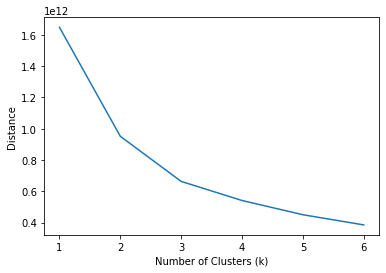

In [11]:
from sklearn.cluster import KMeans
clusters_range = [1, 2, 3, 4, 5, 6]
avg_distance=[]

for n in clusters_range:
    clusterer = KMeans(n_clusters = n).fit(ACAdata2_dr)
    avg_distance.append(clusterer.inertia_)

plt.plot(clusters_range, avg_distance)
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Distance")
plt.show()

Reflection: According to the scree plot and results of Elbow method, the line drop dramatically after it comes to 3. Therefore, it is appropriate to use three cluster, which is consistent with the silhouette plot results in ACA3.